In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets create synthetic data points

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [11]:
X

array([[ 1.76864295,  1.41672336],
       [-0.2899571 , -1.07469893],
       [ 1.18000531, -0.4624989 ],
       ...,
       [-0.76109059, -1.04388931],
       [-1.48522846,  1.08978604],
       [-1.13672928, -0.98649399]])

<Axes: xlabel='0', ylabel='1'>

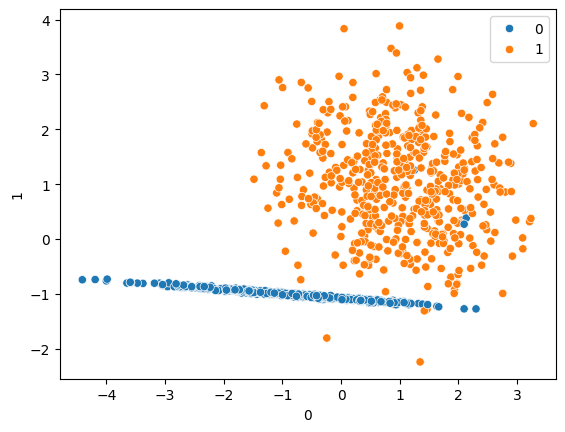

In [12]:
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1], hue= y)

In [16]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC(kernel='linear')

In [17]:
X_train, X_test , y_train, y_test = train_test_split(X,y ,test_size=0.25, random_state=0)

In [18]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix 

In [21]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       123
           1       1.00      0.95      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[123   0]
 [  6 121]]


In [22]:
rbf = SVC(kernel='rbf')

In [23]:
rbf.fit(X_train, y_train)

SVC()

In [25]:
y_pred1 = rbf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       123
           1       1.00      0.97      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[123   0]
 [  4 123]]


In [27]:
## kernels are polynomial, sigmoid, linear, rbf , etc

HYPERPARAMETER TUNING 


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [0.1, 1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001],
'kernel': ['rbf','poly']}

In [29]:
grid = GridSearchCV(SVC(), param_grid = param_grid, refit=True, cv = 5, verbose=3)

In [30]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [32]:
y_pred3 = grid.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       123
           1       1.00      0.97      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[123   0]
 [  4 123]]
